In [1]:
## instantaneous goodput

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def help(i):
    file = open('../results-wns3/scheduler-133'+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open('../results-wns3/scheduler-133'+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        if (temp[0] == '3' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal


rr = help(0)  
minrtt = help(1)
blest = help(2)  
ecf = help(3)
peek = help(4)
# mab = help(5)  

# print(rr)


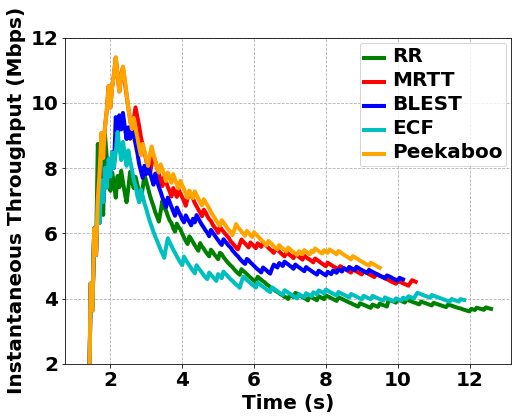

In [3]:

plt.figure(figsize=(8, 6))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
# ax.spines['top'].set_visible(False)  # 去掉上边框
# ax.spines['right'].set_visible(False)  # 去掉右边框


plt.plot(rr['Time'], rr['goodput'], color="green", label="RR", linewidth=4)
plt.plot(minrtt['Time'], minrtt['goodput'], color="red", label="MRTT", linewidth=4)
plt.plot(blest['Time'], blest['goodput'], color="blue", label="BLEST", linewidth=4)
plt.plot(ecf['Time'], ecf['goodput'], color="c", label="ECF", linewidth=4)
plt.plot(peek['Time'], peek['goodput'], color="orange", label="Peekaboo", linewidth=4)

# group_labels = ['1-1', '1-2', '1-3', '1-4', '1-5', '1-6', '1-7', '1-8', '1-9']  # x轴刻度的标识
plt.xticks(fontsize=20, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=20, fontweight='bold')
# plt.title("Medium Dynamicity", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.ylabel("Instantaneous Throughput (Mbps)", fontsize=20, fontweight='bold')
plt.xlabel("Time (s)", fontsize=20, fontweight='bold')
# plt.xlim(4, 15)  # 设置x轴的范围
# plt.ylim(4, 14)
plt.ylim(2, 12)

# plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=20, fontweight='bold')  # 设置图例字体的大小和粗细

# plt.savefig('./goodput_low.pdf', format='pdf')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
# plt.savefig('./goodput_medium.pdf', format='pdf')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.savefig('./ins_throughput_scheduler.pdf', format='pdf')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.savefig('./ins_throughput_scheduler.png', format='png')  # 建议保存为svg格式,再用在线转换工具转为矢量图emf后插入word中
plt.show()


In [161]:
# rr = dataTotal.loc[dataTotal['scheduler'] == "0"]
# minrtt = dataTotal.loc[dataTotal['scheduler'] == "1"]
# blest = dataTotal.loc[dataTotal['scheduler'] == "2"]
# print(mab)